# Bayesian Data Analysis - Project

In [1]:
%%capture
import pystan
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math, Latex

code = """
data {
    int<lower=0> N;  // number of data points
    vector[N] x;     // observation year
    vector[N] y;     // observation number of drowned
    real xpred;      // prediction year
}
parameters {
    real alpha;
    real beta;
    real<lower=0> sigma;
}
transformed parameters {
    vector[N] mu;
    mu = alpha + beta*x;
}
model {
    beta ~ normal(0, 18.5483);
    y ~ normal(mu, sigma);
}
generated quantities {
    real ypred;
    ypred = normal_rng(alpha+beta*xpred, sigma);
}
"""
sm = pystan.StanModel(model_code=code)

We can then sample from the model with the data.

In [2]:
year_list = []
number_list = []
with open("drowning.txt", "r") as ifile:
    for line in ifile:
        values = line.split()
        year_list.append(int(values[0])) 
        number_list.append(int(values[1])) 

drowning_dat = {'N': len(year_list),
               'x': year_list,
               'y': number_list,
               'xpred': 2019
              }
fit = sm.sampling(data=drowning_dat)

The resulting scatterplots are then as follows:

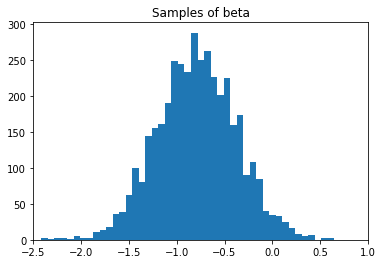

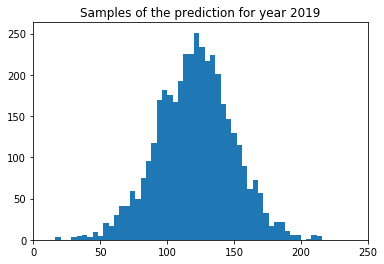

In [3]:
s = fit.summary()
samples = fit.extract(permuted=True)

plt.hist(samples['beta'], bins=50)
plt.xlim([-2.5, 1])
plt.title("Samples of beta")
plt.show()


plt.hist(samples['ypred'], bins=50)
plt.xlim([0, 250])
plt.title("Samples of the prediction for year 2019")
plt.show()
